In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
# Lecture des départements
dept = pd.read_csv(
    data_url + "departements-region.csv",
    sep=",",
    header=0,
    names=[
        "Num_Département",
        "Département",
        "Région",
    ],
)
# Lecture des dommages aux animaux de rente
dommages = pd.read_csv(
    data_url + "dommages.csv", 
    sep=";")
dommages = pd.merge(dommages, dept, on="Département")
# Lecture des tirs létaux sur les loups
interventions = pd.read_csv(data_url + "protocole_intervention.csv", sep=";")
interventions = pd.merge(interventions, dept, on="Département")

In [6]:
dommages_y = dommages.groupby(["Année", "Région"])
dommages_y.sum(numeric_only=True)


Nb_dossiers  Nb_animaux_tués
Année Région                                                  
2016  Auvergne-Rhône-Alpes                629             2959
      Bourgogne-Franche-Comté               2                4
      Grand Est                           154              475
      Occitanie                            97              324
      Provence-Alpes-Côte d'Azur         1874             6170
2017  Auvergne-Rhône-Alpes                835             3323
      Bourgogne-Franche-Comté               7               47
      Grand Est                           124              426
      Nouvelle-Aquitaine                    1                1
      Occitanie                           150              594
      Provence-Alpes-Côte d'Azur         2111             7602
2018  Auvergne-Rhône-Alpes                852             2902
      Bourgogne-Franche-Comté               8               35
      Grand Est                           128              431
      Hauts-de-France                       0                0
      Normandie                             0                0
      Nouvelle-Aquitaine                   22              152
      Occitanie                           157              460
      Provence-Alpes-Côte d'Azur         1921             6692
2019  Auvergne-Rhône-Alpes               1014             3645
      Bourgogne-Franche-Comté              38              109
      Centre-Val de Loire                   0                0
      Grand Est                           210              474
      Hauts-de-France                       0                0
      Normandie                             0                0
      Nouvelle-Aquitaine                   16               72
      Occitanie                            75              241
      Pays de la Loire                      0                0
      Provence-Alpes-Côte d'Azur         2298             7553
2020  Auvergne-Rhône-Alpes               1168             3978
      Bourgogne-Franche-Comté             100              402
      Centre-Val de Loire                   0                0
      Grand Est                           132              258
      Hauts-de-France                       2                2
      Normandie                            41               62
      Nouvelle-Aquitaine                   22               76
      Occitanie                            94              396
      Pays de la Loire                      0                0
      Provence-Alpes-Côte d'Azur         2111             6572
2021  Auvergne-Rhône-Alpes               1138             3036
      Bourgogne-Franche-Comté             115              716
      Centre-Val de Loire                   3                9
      Grand Est                            63              194
      Hauts-de-France                       0                0
      Normandie                            24               62
      Nouvelle-Aquitaine                   23               65
      Occitanie                           148              591
      Pays de la Loire                     11               31
      Provence-Alpes-Côte d'Azur         2012             6122
2022  Auvergne-Rhône-Alpes                870             2893
      Bourgogne-Franche-Comté              46              192
      Centre-Val de Loire                   0                0
      Grand Est                            57              125
      Hauts-de-France                       5               15
      Normandie                            40               76
      Nouvelle-Aquitaine                   72              286
      Occitanie                           226              875
      Pays de la Loire                      0                0
      Provence-Alpes-Côte d'Azur         1214             3576

In [7]:
interventions_y = interventions.groupby(["Année"])
interventions_y.sum(numeric_only=True)

,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident
Année,,,,,,,
2012,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,8.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,19.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,33.0,0.0,5.0
2017,0.0,0.0,0.0,0.0,34.0,1.0,1.0
2018,1469.0,161.0,5.0,15.0,47.0,4.0,27.0
2019,1609.0,210.0,12.0,2.0,94.0,5.0,20.0
2020,2084.0,319.0,7.0,2.0,97.0,8.0,0.0


In [8]:
# Apply the default theme
sns.set_theme()

In [20]:
dommages_max = dommages.query(
    "Num_Département == '06' or Num_Département == '04' or Num_Département == '05'" + 
    "or Num_Département == '26' or Num_Département == '38' or Num_Département == '73' or Num_Département == '74'")

<AxesSubplot: xlabel='Année', ylabel='Nb_animaux_tués'>

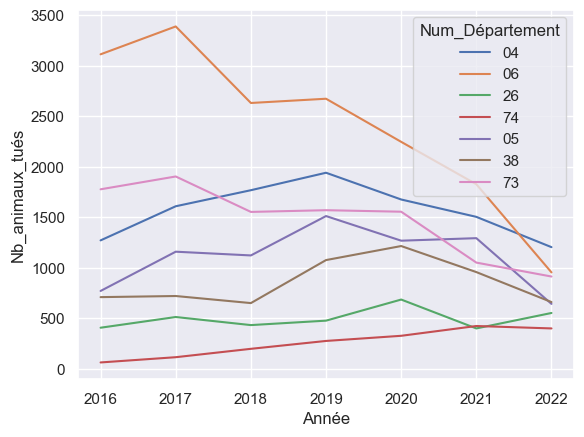

In [21]:
sns.lineplot(data=dommages_max, x="Année", y="Nb_animaux_tués", hue="Num_Département")